In [305]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import re
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager
import math

In [306]:

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/leocenturion/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [307]:
import io


In [308]:
tokenized_corpus = []
for file in os.listdir('./gutenberg_ebooks/'):
    with open(f'./gutenberg_ebooks/{file}', encoding="utf-8") as f:
        for line in f:
            cleaned_sentence = re.sub(r'[^a-zA-Z\s_]', '', line).lower()
            tokens = word_tokenize(cleaned_sentence, language='english')
            tokenized_corpus.append(tokens)


In [309]:
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=25,
    window=10,
    min_count=1,
    workers=12,
    sg=0
)

In [310]:
similarity_king_queen = model.wv.similarity('king', 'queen')
similarity_king_queen

0.79874563

In [327]:
labels = list(model.wv.index_to_key)
vectors = model.wv.vectors

tsne_model = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    n_iter=250,
    init='pca',
    learning_rate='auto',
    n_jobs=12

)

# new_values = tsne_model.fit_transform(vectors)

In [328]:

def plot_with_tsne(model, words_to_plot=None, perplexity=30, n_iter=1000, random_state=42):
    return

def plot():
    x = [value[0] for value in new_values]
    y = [value[1] for value in new_values]

    plt.figure(figsize=(16, 10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        try:
            plt.annotate(
                labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom',
                fontproperties=matplotlib.font_manager.FontProperties(size=10)
            )
        except Exception:
            plt.annotate(
                labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom'
            )

    plt.title(f"t-SNE visualization (Perplexity: {effective_perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()


In [329]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(model.wv.vectors)

In [343]:
def draw_scatter_in_ax(vectors, model, root, ax):
    ax.scatter(vectors[0], vectors[1], color='blue')
    similar_words = [word for word, cos in model.wv.most_similar(positive=[root], topn=5)]
    coords = transformed[model.wv.get_index(root)]
    ax.scatter(coords[0], coords[1], color='yellow')
    print(f'similar words to {root}: {similar_words}')
    for similar in similar_words:
        coords = transformed[model.wv.get_index(similar)]
        ax.scatter(coords[0], coords[1], color='red')
        ax.set_title(f'similar words to {root}')

def plot_related_words(vectors, model, root):
    fig,ax  = plt.subplots(nrows=1, ncols=1)
    draw_scatter_in_ax(vectors, model, root, ax)
    plt.show()

def plot_related_words_grid(vectors, model, roots):
    fig,ax  = plt.subplots(nrows=math.floor(len(roots)/2), ncols=2, figsize=(15, 15))
    col = 0
    for idx, root in enumerate(roots):
        row = math.floor(idx/2)
        if len(roots) > 2:
            draw_scatter_in_ax(vectors, model, root, ax[row, col%2])
        else:
            draw_scatter_in_ax(vectors, model, root, ax[col%2])
        col += 1
    plt.show()

In [331]:
vec = np.array([2.5, 5.0])
def closest_word_to(vec):
    closest_word_idx = np.argmin(np.linalg.norm(transformed - vec, axis=1))
    closest_word = model.wv.index_to_key[closest_word_idx]
    return closest_word



# Exploración del embedding

A continuación exploramos el espacio de dimensiones reducido encontrando las palabras mas cercanas a un vector dado.


similar words to shooes: ['forbidwe', 'dandouilles', 'circenses', 'arisque', 'drippingwet']
similar words to lifetime: ['acquaintance', 'contemporaries', 'courtship', 'decease', 'successors']
similar words to _and: ['qq', 'to_', 'capell', 'malone', 'rowe']
similar words to above: ['from', 'over', 'tradeunionism', 'through', 'in']
similar words to meet: ['engage', 'keep', 'attend', 'join', 'go']
similar words to edition: ['translation', 'printer', 'volume', 'introduction', 'publication']


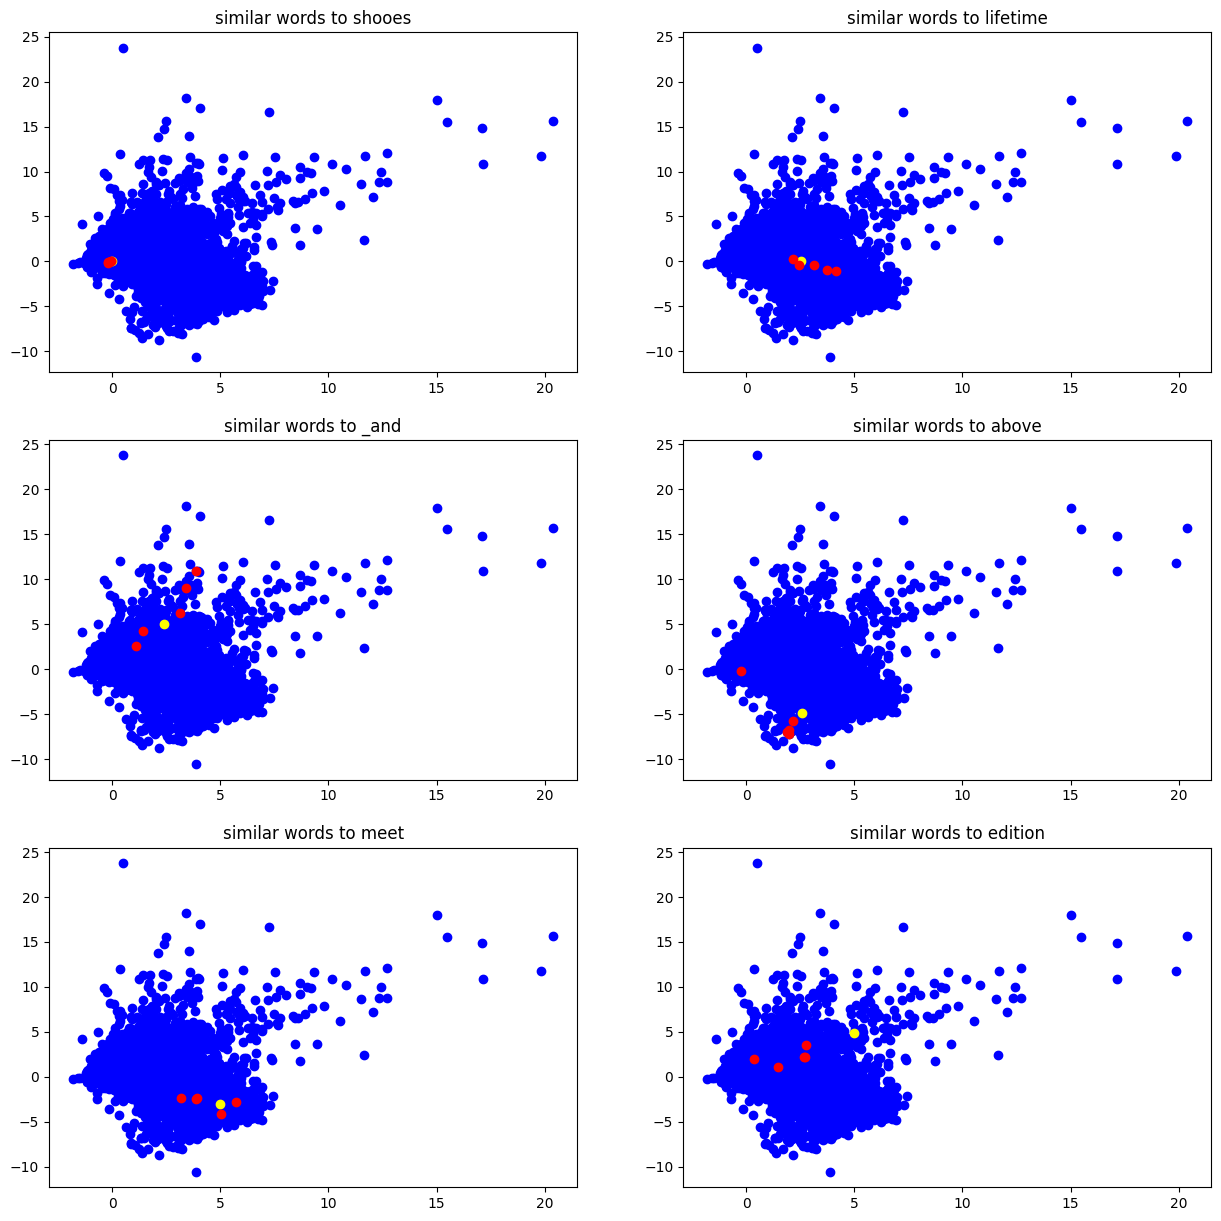

In [332]:
words = [
    closest_word_to(np.array([0, 0])),
    closest_word_to(np.array([2.5, 0])),
    closest_word_to(np.array([2.5, 5.0])),
    closest_word_to(np.array([2.5,  -5.0])),
    closest_word_to(np.array([5.0,  -3.0])),
    closest_word_to(np.array([5.0,  5.0])),
]
plot_related_words_grid(transformed.T, model, words)

Notamos como las palabras en ingles antiguo como shooes (Shakespeare - Life of king Henry the Fifth) se encuentran agrupadas juntas.

# Exploración de conceptos

Ahora exploramos conceptos particulares que sabemos se mencionan en uno o mas textos.

similar words to evolution: ['sterility', 'elaboration', 'suppression', 'transition', 'magnetism']
similar words to soul: ['mind', 'nature', 'heart', 'body', 'intellect']
similar words to government: ['society', 'commonwealth', 'administration', 'custom', 'jurisdiction']
similar words to man: ['woman', 'workman', 'citizen', 'person', 'creature']
similar words to god: ['zeus', 'heaven', 'gods', 'deity', 'justice']
similar words to athens: ['sparta', 'rome', 'lacedaemon', 'carthage', 'constantinople']
similar words to caesar: ['pompey', 'antony', 'emperor', 'belisarius', 'marius']
similar words to philosophy: ['science', 'politics', 'theology', 'rhetoric', 'morality']


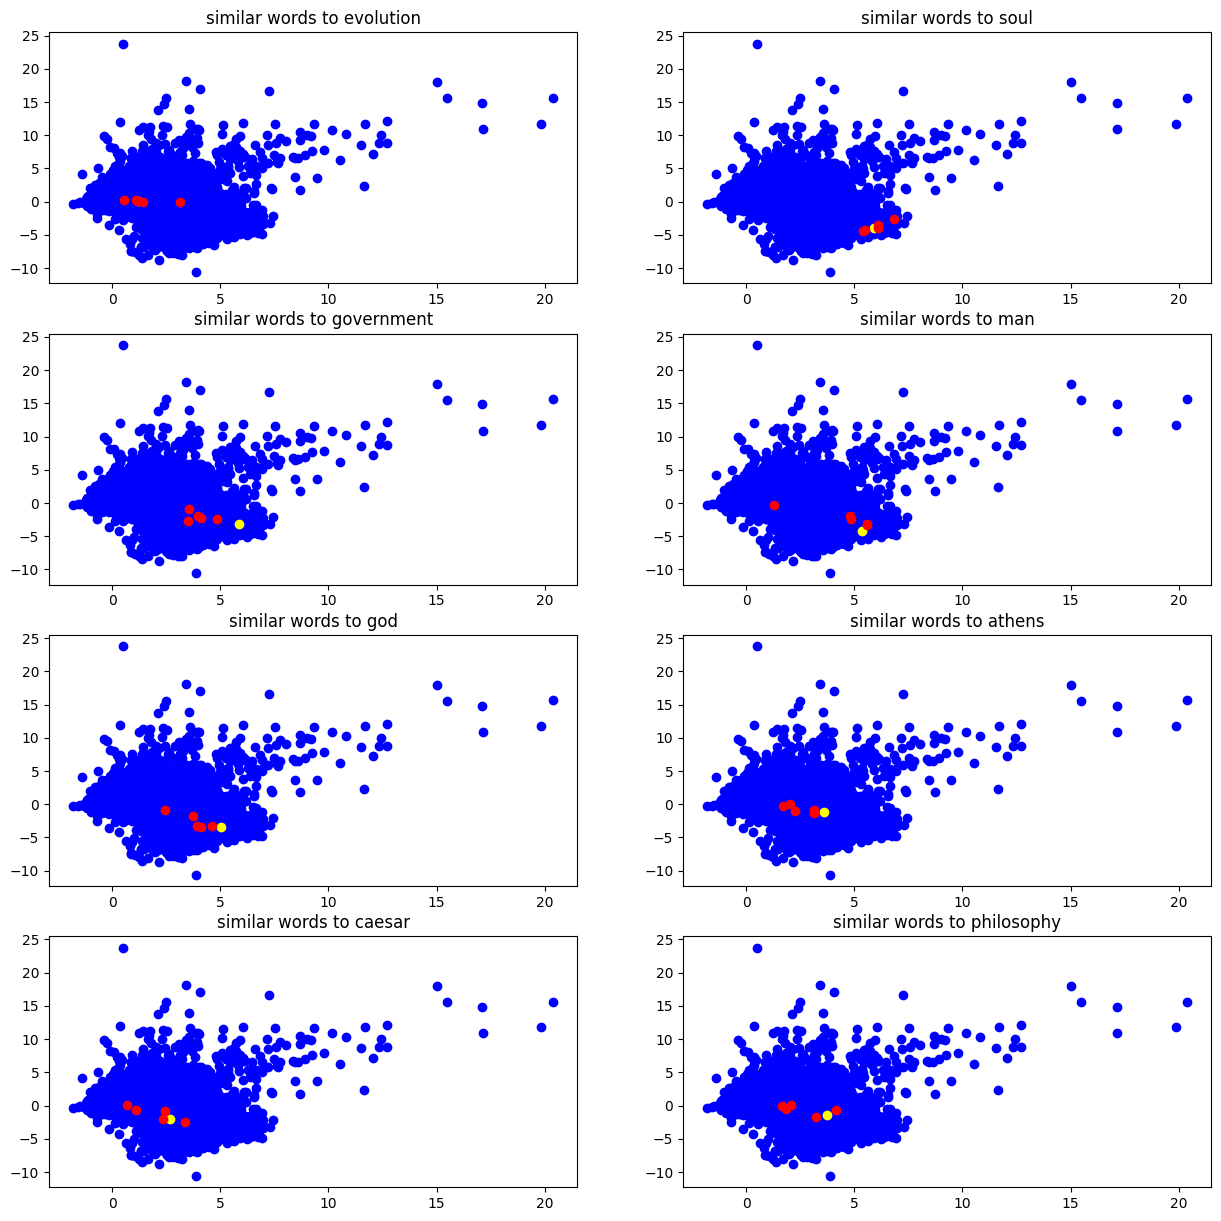

In [333]:
words = [
    'evolution',
    'soul',
    'government',
    'man',
    'god',
    'athens',
    'caesar',
    'philosophy'
]
plot_related_words_grid(transformed.T, model, words)

Vemos que hay una buena coherencia en las relaciones, por ejemplo Atenas se relaciona con Roma, Esparta, y Constantinopla. Tambien el las palabras relacionadas a Gobierno parecen tener sentido: Comonwealth, Sociedad, administracion, democracia. 

# Outliers

Analizamos un poco mas los puntos que se ven alejados del cluster central.

similar words to que: ['yo', 'pero', 'ya', 'con', 'porque']
similar words to et: ['est', 'qui', 'cum', 'quam', 'esse']


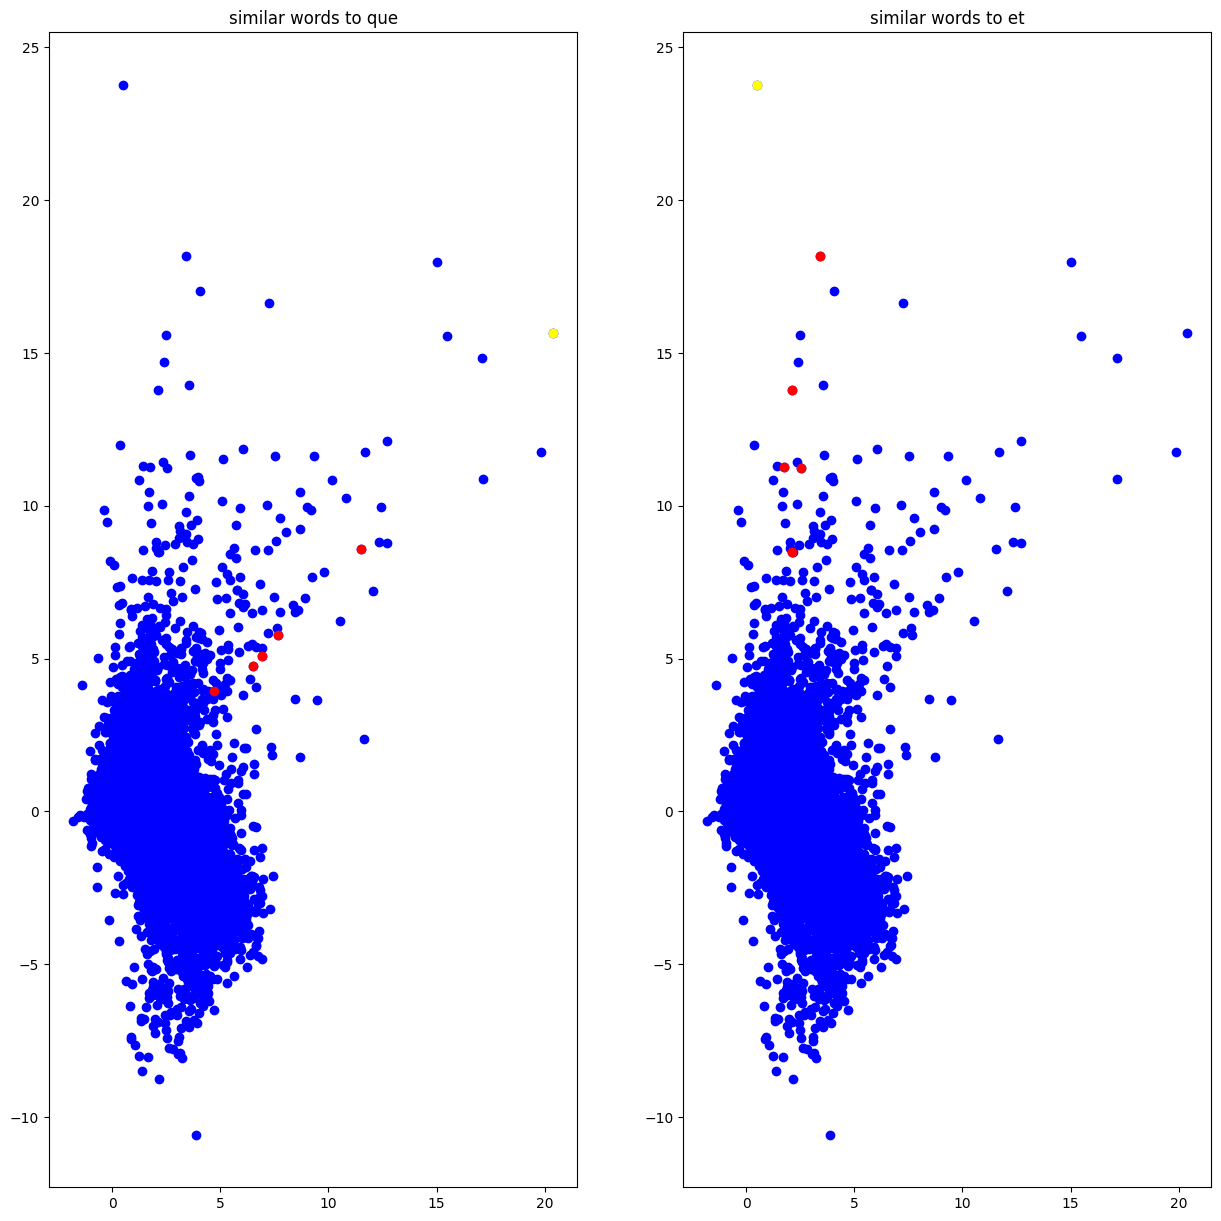

In [344]:
words = [
    model.wv.index_to_key[np.argmax(transformed.T[0])],
    model.wv.index_to_key[np.argmax(transformed.T[1])]
]
plot_related_words_grid(transformed.T, model, words)

Las palabras outlier corresponden a otros idiomas. Notemos que palabras en una variante del ingles, como shooes (ingles de la epoca de Shakespeare) no aparecen lejos del cluster central de embeddings. Esto se puede explicar porque ese variante del ingles contiene palabras del ingles moderno, con lo cual, estas aparecerán dentro de la ventana de cbow o skipgram junto a las palabras arcaicas como shooes.

# Mediana en ambas dimensiones

Buscamos las palabras que se encuentran en la mediana de cada eje.

In [345]:
print(f'{np.mean(transformed.T[0])} {np.mean(transformed.T[1])}')
np.argsort(transformed.T[0])[len(transformed.T[0])//2]

-1.0809371815412305e-06 -1.475651060900418e-06


223650

median word: junxit
similar words to junxit: ['indic', 'agrable', '_elect', 'shelllike', 'malecontent']


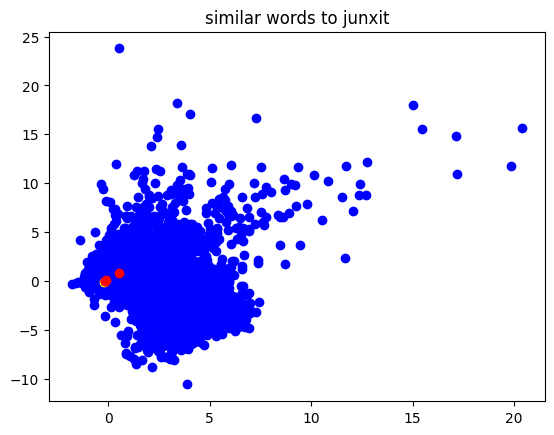

In [347]:
median_word = model.wv.index_to_key[np.argsort(transformed.T[0])[len(transformed.T[0])//2]]
print(f'median word by first dimension: {median_word}')
plot_related_words(transformed.T, model, median_word)

median word by second dimension: sclerosis
similar words to sclerosis: ['sirsi', 'coalescence', 'utconvicti', 'bonatelli', 'semilunar']


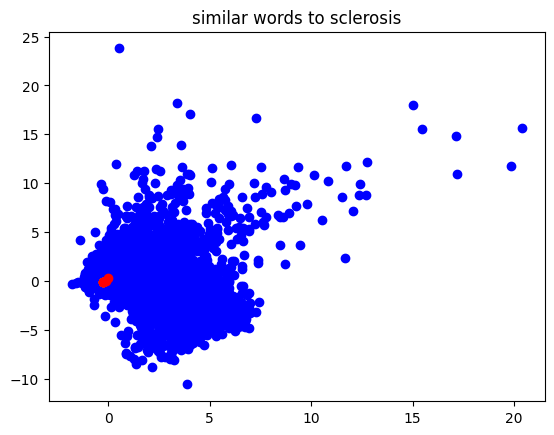

In [349]:
median_word = model.wv.index_to_key[np.argsort(transformed.T[1])[len(transformed.T[1])//2]]
print(f'median word by second dimension: {median_word}')
plot_related_words(transformed.T, model, median_word)

Notamos que las dos medianas estan cerca del 0,0. Investigamos mas en la siguiente sección.

# Histograma

Exploramos la densidad de los embeddings en el espacio reducido de dimensiones.

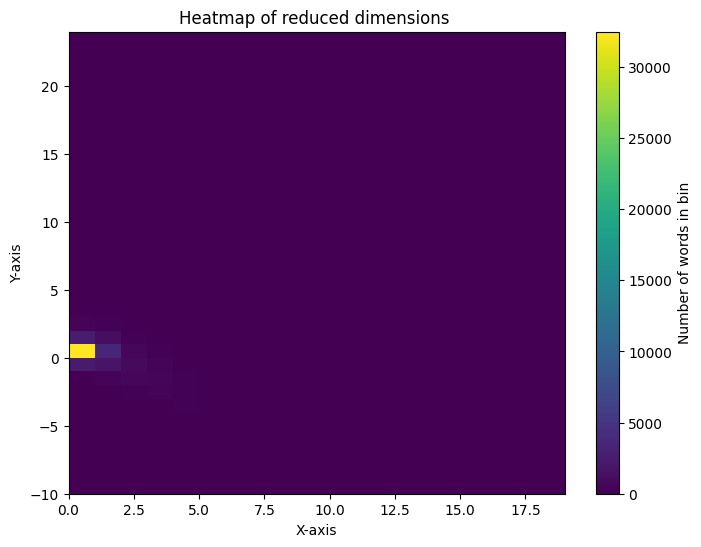

In [402]:
hist, x_edge, y_edge = np.histogram2d(transformed.T[0], transformed.T[1], bins=[list(range(0, 20)), list(range(-10,25))])
plt.figure(figsize=(8, 6))
mesh = plt.pcolormesh(x_edge, y_edge, hist.T, cmap='viridis')
plt.colorbar(mesh, label='Number of words in bin')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of reduced dimensions ')

plt.show()

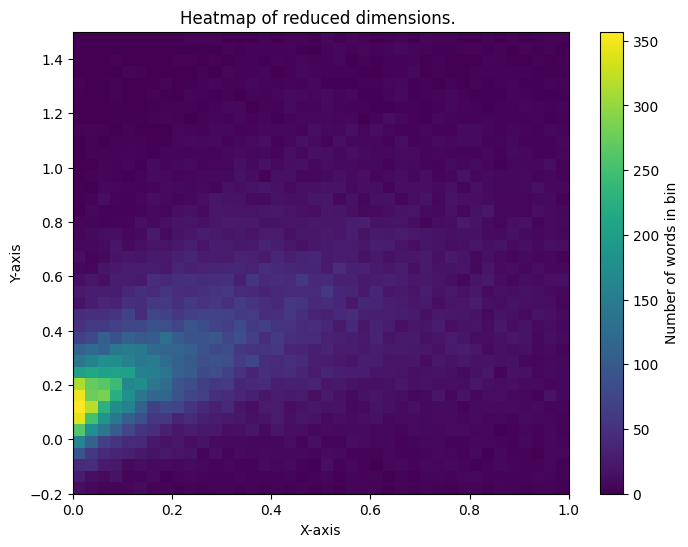

In [403]:
x_axis_range = [0.0, 1.0]
y_axis_range = [-0.2, 1.5]

hist, x_edge, y_edge = np.histogram2d(
    transformed.T[0],
    transformed.T[1],
    bins=[40, 40],
    range=[x_axis_range, y_axis_range]
)
plt.figure(figsize=(8, 6))
mesh = plt.pcolormesh(x_edge, y_edge, hist.T, cmap='viridis')
plt.colorbar(mesh, label='Number of words in bin')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of reduced dimensions. ')
plt.xlim(x_axis_range[0], x_axis_range[1])
plt.ylim(y_axis_range[0], y_axis_range[1])

plt.show()

Casi todas las palabras se concentran en un reducido espacio cerca del 0, 0.

# Relaciones entre palabras

Exploramos los resultados de sumar y restar conceptos.

In [406]:
model.wv.most_similar(positive=["monarch", "man"], negative=[], topn=5)

[('tyrant', 0.8642423748970032),
 ('prince', 0.8638024926185608),
 ('fortune', 0.8265501856803894),
 ('barbarian', 0.7947003245353699),
 ('citizen', 0.7882347702980042)]

In [407]:
model.wv.most_similar(positive=["monarch"], negative=["man"], topn=5)

[('romedecay', 0.8116341829299927),
 ('courtsy', 0.7673810720443726),
 ('youlet', 0.7657886743545532),
 ('illcontent', 0.7314774394035339),
 ('_cataneo_', 0.7165592908859253)]

In [410]:
model.wv.most_similar(positive=["queen"], negative=["woman"], topn=5)

[('helenistas', 0.6913874745368958),
 ('rochel', 0.6889942288398743),
 ('raphelingius', 0.6627084016799927),
 ('halfrounding', 0.6562399864196777),
 ('malvoisian', 0.6561940908432007)]

In [413]:
model.wv.most_similar(positive=["king", "woman"], negative=[], topn=5)

[('prince', 0.8642305731773376),
 ('murderer', 0.8549700975418091),
 ('son', 0.840620756149292),
 ('hero', 0.8289119005203247),
 ('queen', 0.8287787437438965)]

In [421]:
model.wv.most_similar(positive=["prince", "mature"], negative=[], topn=5)

[('victory', 0.7986549735069275),
 ('youth', 0.7959103584289551),
 ('triumph', 0.7860413789749146),
 ('prosperity', 0.7747105956077576),
 ('education', 0.7729088664054871)]

In [411]:
model.wv.most_similar(positive=["citizen", "vote"], negative=[], topn=5)

[('magistrate', 0.8991307616233826),
 ('person', 0.8727681040763855),
 ('admission', 0.8666452169418335),
 ('oath', 0.8382782936096191),
 ('commission', 0.8328943252563477)]

In [ ]:
model.wv.most_similar(positive=["citizen", "vote"], negative=[], topn=5)

In [412]:
model.wv.most_similar(positive=["man", "vote"], negative=[], topn=5)

[('person', 0.9317719340324402),
 ('quarrel', 0.8678154945373535),
 ('citizen', 0.8668201565742493),
 ('magistrate', 0.8503814339637756),
 ('admission', 0.8370629549026489)]

En las relaciones entre palabras el resultado no fue tan positivo. Por ejemplo queen - woman no tiene ningun consepto de realeza asociado. Citizen + vote no tiene nada relacionado a la democracia. King + woman tiene en el top 5 a queen, lo cual es un buen signo. 

# Conclusiones

Si bien la similitud de algunos términos resulto aceptable, las relaciones semánticas no. Queda como trabajo a realizar evaluar mas combinaciones de parámetros que puedan hacer que mejore el desempeño en ese caso de uso. Tambien se puede investigar si la concentración de términos en un espacio reducido tiene un impacto negativo. Esto es posible ya que, por ejemplo, la resta de [0.001, -0.003] con [10, 15] es prácticamente [10, 15] con lo cual podrían darse casos donde la falta de uniformidad este causando los problemas observados.